In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import xgboost as xgb

import events_package.utils as utils
from events_package.Experiment import Experiment
from events_package.config import TWO_LAYERS_ZEE, FIVE_LAYERS

# 1. Importing Z->ee Data

In [2]:
TWO_LAYERS_ZEE.dimensions

{'emb1': (3, 17), 'emb2': (7, 9)}

In [3]:
# Import data
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\Zee\zee_pq"
)
Zee = Experiment(dataset_df, config=TWO_LAYERS_ZEE)
Zee.length

46679

In [4]:
Zee.dataset[:20]

,event_no,candidate_no,z,et,eta,phi,emb1_eta,emb1_phi,emb2_eta,emb2_phi,...,"emb2_(5,8)","emb2_(6,0)","emb2_(6,1)","emb2_(6,2)","emb2_(6,3)","emb2_(6,4)","emb2_(6,5)","emb2_(6,6)","emb2_(6,7)","emb2_(6,8)"
0,1.0,0.0,42.217091,25733.016,-1.393911,-1.593792,-1.380333,-1.619884,-1.397445,-1.583068,...,26.048916,0.000000,0.000000,0.000000,0.000000,51.158871,-7.813601,109.862660,-15.753981,-7.817077
1,3.0,0.0,46.031223,40739.168,0.987900,2.006840,1.005158,2.012583,1.019757,2.000311,...,-66.925095,54.701092,77.900955,14.638143,22.827440,-44.944962,45.838196,-16.044952,150.497740,-36.091103
2,4.0,0.0,70.900459,41794.922,-1.117001,-0.531028,-1.089572,-0.539961,-1.095295,-0.527689,...,237.208510,23.108679,-63.371807,31.046824,108.851920,75.588974,33.681137,-25.266497,-38.620983,-9.857155
3,5.0,0.0,-85.234207,147589.170,0.604559,-2.205121,0.558074,-2.208932,0.566532,-2.196661,...,123.937390,-17.983301,-12.421917,189.938220,125.280710,789.678040,-112.345240,-73.728889,-9.117133,224.521550
4,5.0,1.0,-85.234207,20632.229,1.239572,2.194208,1.208378,2.208932,1.221191,2.172117,...,-59.510681,188.116640,260.807160,-18.283024,-15.585775,82.586929,-32.556801,-14.118177,-81.079002,76.226044
5,6.0,0.0,41.832558,23089.932,1.235014,2.487976,1.249022,2.503457,1.246370,2.491185,...,110.519450,118.495670,-26.800880,-71.808060,-10.354823,0.000006,29.752987,-49.302513,-38.729313,68.756065
6,7.0,0.0,15.629539,39108.094,-1.064487,0.477447,-1.055181,0.441786,-1.070115,0.478602,...,141.730930,-98.572998,142.368010,216.569700,55.236706,-4.623730,52.118549,191.244320,44.412708,69.213905
7,7.0,1.0,15.629539,30425.994,0.427553,-2.279493,0.436141,-2.307107,0.440636,-2.294835,...,26.828447,127.742150,78.070786,-58.981762,51.233322,-32.111866,12.559529,-36.602211,-21.718422,22.469606
8,8.0,0.0,37.363735,53369.305,1.290316,0.833775,1.299045,0.834486,1.296728,0.822214,...,-93.925659,69.075554,56.274891,1.077547,-49.715649,207.912670,-29.069965,42.590302,-11.483611,-28.573851
9,13.0,0.0,-23.726027,34202.348,-0.920907,-2.262157,-0.930123,-2.208932,-0.944220,-2.245748,...,-19.001328,211.507660,36.543705,-67.612755,122.910660,27.258179,-18.025911,119.614110,290.495420,120.266020


In [5]:
Zee.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 46668
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 46668


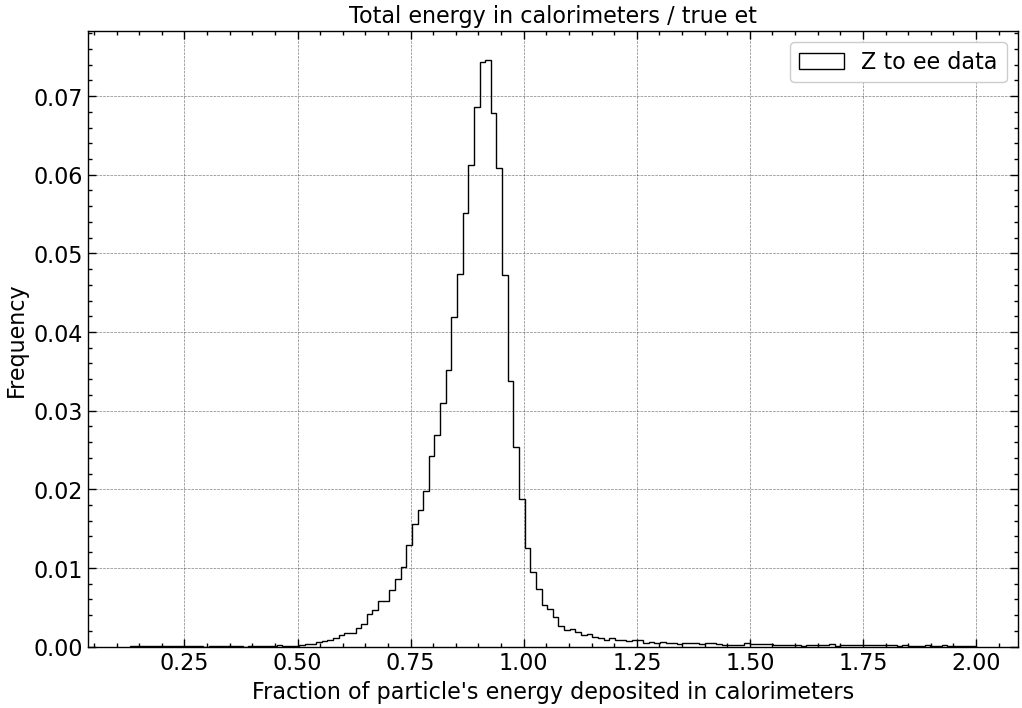

In [6]:
data1 = Zee.tot_layers_et() / Zee.et

mask = data1 < 2.0
data1 = data1[mask]

# Define the number of bins
num_bins = 150
bin_edges = np.linspace(np.min(data1), np.max(data1), num_bins + 1)

# Calculate histograms manually and normalize by the total number of occurrences
hist1, _ = np.histogram(data1, bins=bin_edges)

total_occurrences1 = len(data1)

hist_normalized1 = hist1 / total_occurrences1


with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(12, 8))
    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist_normalized1,
        histtype="step",
        label="Z to ee data",
        # linestyle="dashed",
        color="k",
    )

    # Set labels and title
    plt.xlabel("Fraction of particle's energy deposited in calorimeters")
    plt.ylabel("Frequency")
    plt.title("Total energy in calorimeters / true et")

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

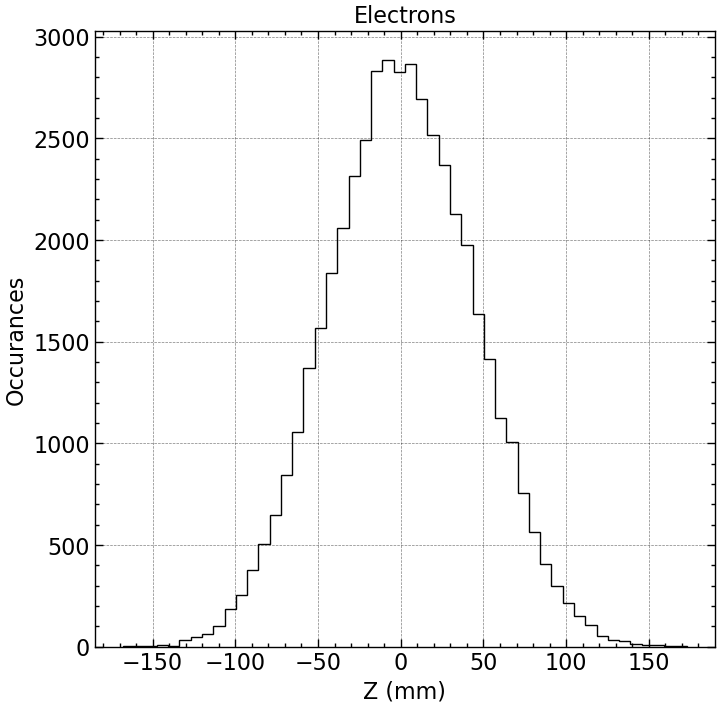

In [7]:
with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        Zee.z,
        bins=50,
        histtype="step",
        label="Z to ee data",
        color="k",
        density=False,
    )
    plt.xlabel("Z (mm)")
    plt.ylabel("Occurances")
    plt.title("Electrons")
    plt.show()

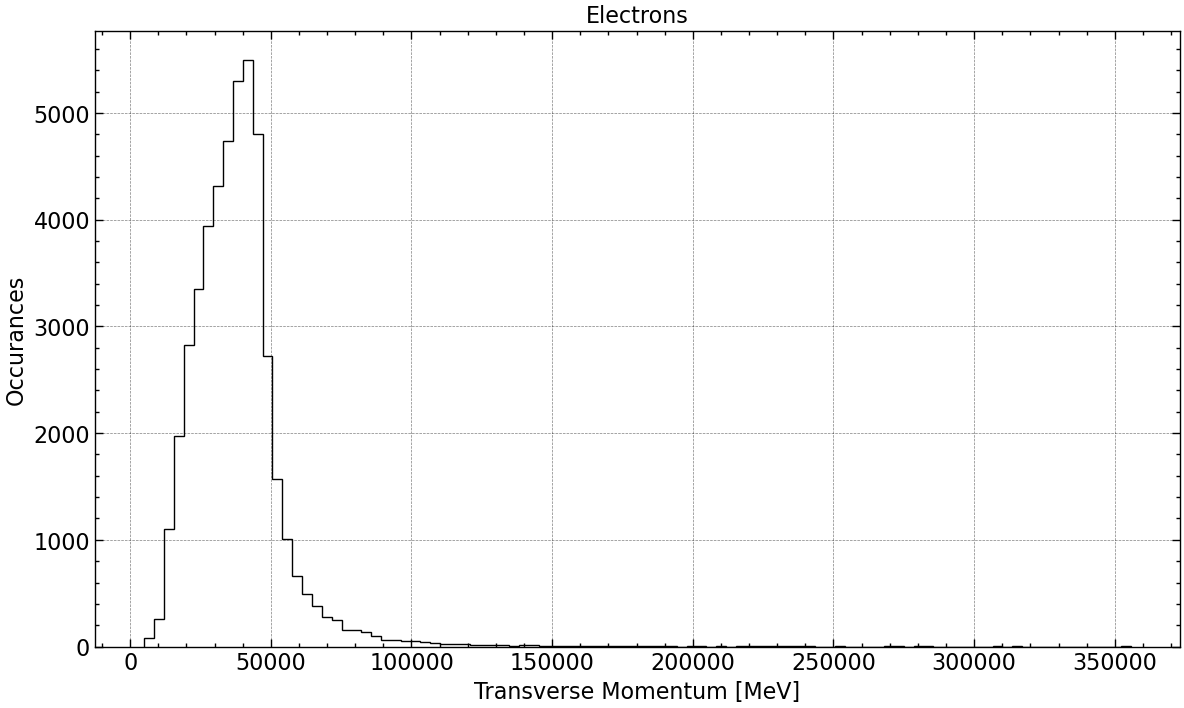

In [8]:
with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(14, 8))
    plt.hist(
        Zee.et,
        bins=100,
        histtype="step",
        label="Z to ee data",
        color="k",
        density=False,
    )
    plt.xlabel("Transverse Momentum [MeV]")
    plt.ylabel("Occurances")
    plt.title("Electrons")
    plt.show()

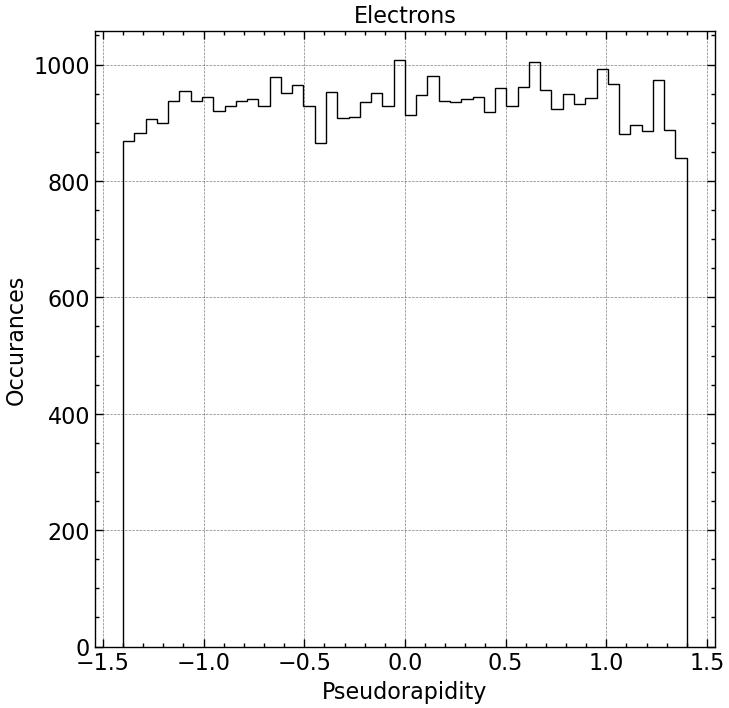

In [9]:
with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        Zee.eta,
        bins=50,
        histtype="step",
        label="Z to ee data",
        color="k",
        density=False,
    )
    plt.xlabel("Pseudorapidity")
    plt.ylabel("Occurances")
    plt.title("Electrons")
    plt.show()